# Abstract



Electrocardiography (ECG) plays a crucial role in the early diagnosis and monitoring of cardiovascular diseases, including arrhythmias, which are irregularities in heart rhythm. This project leverages the MIT-BIH Arrhythmia Database to develop a robust signal classification model capable of accurately identifying different types of arrhythmias from ECG data. The project focuses on preprocessing and feature extraction from raw ECG signals, followed by implementing a Recurrent Neural Network (RNN) model, specifically using Long Short-Term Memory (LSTM) layers, to capture temporal dependencies in the signals. By training and evaluating the model on annotated ECG data from the MIT-BIH database, this work aims to improve the accuracy and efficiency of arrhythmia detection. The outcomes of this research have potential applications in real-time cardiac monitoring systems, enabling more effective, automated, and early detection of heart abnormalities, ultimately contributing to better patient outcomes.

# Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPooling1D, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix

# Read Data

In [ ]:
train_data = pd.read_csv("mitbih_train.csv",header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data = pd.read_csv(r"mitbih_test.csv",header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f"train data size: {train_data.shape}")
print(f"test data size: {test_data.shape}")

train data size: (87554, 188)
test data size: (21892, 188)


In [ ]:
pd.set_option('display.max_rows', None)
print(train_data.isna().sum())

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

# EDA

In [ ]:
# See the number of each class in train dataset
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}


value_counts = train_data.iloc[:,-1].value_counts().rename(labels)

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Train Dataset")

pie_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.show()

In [ ]:
# See the number of each class in test dataset
value_counts_test = test_data.iloc[:,-1].value_counts().rename(labels)

pie_fig = px.pie(names=value_counts_test.index, values=value_counts_test.values,
                 title="The Percentage of Each Label in The Test Dataset")

pie_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.show()

In [ ]:
ecg_0 = train_data.loc[train_data[187]==0, :].iloc[1,:187]
ecg_1 = train_data.loc[train_data[187]==1, :].iloc[1,:187]
ecg_2 = train_data.loc[train_data[187]==2, :].iloc[1,:187]
ecg_3 = train_data.loc[train_data[187]==3, :].iloc[1,:187]
ecg_4 = train_data.loc[train_data[187]==4, :].iloc[1,:187]

ecg_df = pd.DataFrame({'Normal': ecg_0,
                       'Artial Premature': ecg_1,
                       'Premature ventricular contraction': ecg_2,
                       'Fusion of ventricular and normal': ecg_3,
                       'Fusion of paced and normal': ecg_4})
ecg_plot = px.line(ecg_df,
                  labels={'index':'Time Intervals', 'value':'Amplitude (mV)', 'variable':'Categories'},
                  title="One ECG form Each Category")
ecg_plot.update_layout(title_x=0.25, width=1000, height=500)
ecg_plot.show()

# Handle unbalanced

In [ ]:
data = train_data.iloc[:,:187]
labels = train_data.iloc[:,187]
# Initialize RandomOverSampler
ovrs = RandomOverSampler(random_state=42)

# Resample the data
data_resampled, labels_resampled = ovrs.fit_resample(data, labels)

train_df = pd.concat([data_resampled, labels_resampled], axis=1)

train_df.shape

(362355, 188)

In [ ]:
classes = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = train_df.iloc[:,-1].value_counts().rename(classes)

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label After Balancing")

pie_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.show()

# Split

In [ ]:
# Split to features , target
x = train_df.iloc[:,:187]
y = train_df.iloc[:,187]

x_test = test_data.iloc[:,:187]
y_test = test_data.iloc[: ,187]

In [ ]:
# Split train data to train & validation
x_train , x_val , y_train , y_val = train_test_split(x,y ,test_size = 0.2 ,random_state = 42 ,stratify=train_df.iloc[:, 187] )

In [ ]:
print(f"train data size: {x_train.shape}")
print(f"validation data size: {x_val.shape}")
print(f"test data size: {x_test.shape}")

train data size: (289884, 187)
validation data size: (72471, 187)
test data size: (21892, 187)


To reduce dimention i will use Conv1d , BatchNormalization , maxpooling so i will reshape the data

In [ ]:
# Reshape datasets to use them in CNN
x_train = x_train.values.reshape(x_train.shape[0], -1, 1)
x_val = x_val.values.reshape(x_val.shape[0], -1, 1)
x_test = x_test.values.reshape(x_test.shape[0], -1, 1)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)

y_val = tf.keras.utils.to_categorical(y_val)

y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Check the dataset dimensions again
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187, 1)
y_train shape:  (289884, 5)
x_val shape:  (72471, 187, 1)
y_val shape:  (72471, 5)
x_test shape:  (21892, 187, 1)
y_test shape:  (21892, 5)


# Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv1D(64, input_shape=(x_train.shape[1:]), kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, strides=1, padding="same"))


model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, strides=1, padding="same"))



model.add(LSTM(64, return_sequences=True, activation="tanh"))
model.add(LSTM(32, activation="tanh"))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ReduceLROnPlateau reduces the learning rate when a metric has stopped improving, allowing the model to proceed with smaller steps towards the minimum of the loss function. This helps to fine-tune the model's performance and avoid overshooting the optimal solution

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ReduceLROnPlateau(patience=20, monitor='val_loss', min_lr=1e-6, cooldown=20),
    ModelCheckpoint(filepath=r'E:\Codes\ML_projects\best_model.keras',  # Update with .keras extension
                    monitor='val_loss',
                    save_best_only=True)
]


In [ ]:
import tensorflow as tf

# Define the path to save the model checkpoint on the D drive with the .keras extension
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('D:/model_checkpoint.keras', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=10,  # Number of epochs for training
    callbacks=callbacks,  # List of callbacks including ModelCheckpoint
    batch_size=32,  # Size of each batch of data
    validation_data=(x_val, y_val),  # Validation data for model evaluation during training
    verbose=1  # Verbosity level (1 means progress bar)
)


Epoch 1/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 186s 20ms/step - accuracy: 0.7189 - loss: 0.7034 - val_accuracy: 0.9111 - val_loss: 0.2492 - learning_rate: 0.0010
Epoch 2/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 196s 20ms/step - accuracy: 0.9447 - loss: 0.1592 - val_accuracy: 0.9673 - val_loss: 0.1002 - learning_rate: 0.0010
Epoch 3/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 173s 19ms/step - accuracy: 0.9680 - loss: 0.0955 - val_accuracy: 0.9624 - val_loss: 0.1129 - learning_rate: 0.0010
Epoch 4/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 178s 20ms/step - accuracy: 0.9767 - loss: 0.0701 - val_accuracy: 0.9830 - val_loss: 0.0511 - learning_rate: 0.0010
Epoch 5/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 174s 19ms/step - accuracy: 0.9810 - loss: 0.0591 - val_accuracy: 0.9762 - val_loss: 0.0659 - learning_rate: 0.0010
Epoch 6/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 205s 20ms/step - accuracy: 0.9840 - loss: 0.0498 - val_accuracy: 0.9826 - val_loss: 0.0556 - learning_rate: 0.0010
Epoch 7/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 203s 20ms/step -

<Axes: >

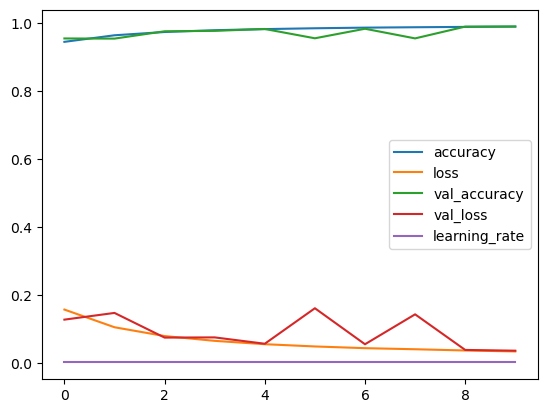

In [ ]:
Results_1=pd.DataFrame(model.history.history)
Results_1.plot()

In [ ]:
y_pred = model.predict(x_test)


685/685 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18118
           1       0.56      0.87      0.68       556
           2       0.93      0.96      0.94      1448
           3       0.60      0.85      0.71       162
           4       0.95      0.99      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.81      0.93      0.86     21892
weighted avg       0.97      0.97      0.97     21892



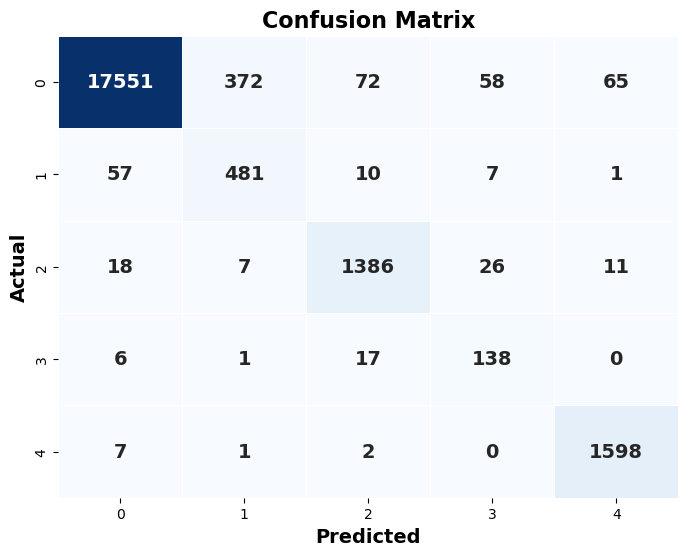

In [ ]:
# confusion matrix
confusion = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# prompt: can you save the current model so that  can give some inpute for it to predict

# Save the trained model in the .keras format
model.save('ECG_arrhythmia_model.keras')

print("Model saved successfully as 'ECG_arrhythmia_model.keras'")

# Load the saved model for prediction
loaded_model = tf.keras.models.load_model('ECG_arrhythmia_model.keras')

print("Model loaded successfully from 'ECG_arrhythmia_model.keras'")


NameError: name 'model' is not defined

In [ ]:
# prompt: ecg_pac_signal = np.array([0.8336565654063267, 0.8229948729271145, 0.7869033459641165, 0.7843461989742375, 0.8147374190925492, 0.8031950363895074, 0.8492650011610835, 0.8065774447067764, 0.7847134568543367, 0.7907506670403828, 0.8945771477772431, 0.9892578736980922, 1.0473228596407851, 1.0847374190925492, 1.0831950363895074, 1.0492650011610835, 0.9065774447067764, 0.8847134568543367, 0.8907506670403828, 0.9445771477772431, 1.1892578736980922, 1.7473228596407851, 2.3847374190925492, 2.4831950363895074, 2.0492650011610835, 1.5065774447067764, 1.0847134568543367, 0.9907506670403828, 1.0445771477772431, 1.1092578736980922, 1.0473228596407851, 0.9847374190925492, 0.9331950363895074, 0.8992650011610835, 0.8565774447067764, 0.8347134568543367, 0.8407506670403828, 0.9445771477772431, 1.1892578736980922, 1.7473228596407851, 2.1847374190925492, 2.2831950363895074, 1.8492650011610835, 1.3065774447067764, 0.9847134568543367, 0.8907506670403828, 0.9445771477772431, 0.9892578736980922, 0.9473228596407851, 0.8847374190925492, 0.8831950363895074, 0.8492650011610835, 0.8065774447067764, 0.7847134568543367, 0.7907506670403828, 0.8445771477772431, 0.9892578736980922, 1.0473228596407851, 1.0847374190925492, 1.1831950363895074, 1.1492650011610835, 1.0065774447067764, 0.9847134568543367, 0.9907506670403828, 1.0445771477772431, 1.1892578736980922, 1.7473228596407851, 2.3847374190925492, 2.4831950363895074, 2.0492650011610835, 1.5065774447067764, 1.0847134568543367, 0.9907506670403828, 1.0445771477772431, 1.0892578736980922, 1.0473228596407851, 0.9847374190925492, 0.9331950363895074, 0.8992650011610835, 0.8565774447067764, 0.8347134568543367, 0.8407506670403828, 0.8445771477772431, 0.8892578736980922, 0.9473228596407851, 0.9847374190925492, 0.9831950363895074, 0.9492650011610835, 0.9065774447067764, 0.8847134568543367, 0.8907506670403828, 0.9445771477772431, 0.9892578736980922, 1.0473228596407851, 1.0847374190925492, 1.0831950363895074, 1.0492650011610835, 1.0065774447067764, 0.98471345685

import numpy as np
# The original ECG signal is an array
ecg_pac_signal = np.array([0.8336565654063267, 0.8229948729271145, 0.7869033459641165, 0.7843461989742375, 0.8147374190925492, 0.8031950363895074, 0.8492650011610835, 0.8065774447067764, 0.7847134568543367, 0.7907506670403828, 0.8945771477772431, 0.9892578736980922, 1.0473228596407851, 1.0847374190925492, 1.0831950363895074, 1.0492650011610835, 0.9065774447067764, 0.8847134568543367, 0.8907506670403828, 0.9445771477772431, 1.1892578736980922, 1.7473228596407851, 2.3847374190925492, 2.4831950363895074, 2.0492650011610835, 1.5065774447067764, 1.0847134568543367, 0.9907506670403828, 1.0445771477772431, 1.1092578736980922, 1.0473228596407851, 0.9847374190925492, 0.9331950363895074, 0.8992650011610835, 0.8565774447067764, 0.8347134568543367, 0.8407506670403828, 0.9445771477772431, 1.1892578736980922, 1.7473228596407851, 2.1847374190925492, 2.2831950363895074, 1.8492650011610835, 1.3065774447067764, 0.9847134568543367, 0.8907506670403828, 0.9445771477772431, 0.9892578736980922, 0.9473228596407851, 0.8847374190925492, 0.8831950363895074, 0.8492650011610835, 0.8065774447067764, 0.7847134568543367, 0.7907506670403828, 0.8445771477772431, 0.9892578736980922, 1.0473228596407851, 1.0847374190925492, 1.1831950363895074, 1.1492650011610835, 1.0065774447067764, 0.9847134568543367, 0.9907506670403828, 1.0445771477772431, 1.1892578736980922, 1.7473228596407851, 2.3847374190925492, 2.4831950363895074, 2.0492650011610835, 1.5065774447067764, 1.0847134568543367, 0.9907506670403828, 1.0445771477772431, 1.0892578736980922, 1.0473228596407851, 0.9847374190925492, 0.9331950363895074, 0.8992650011610835, 0.8565774447067764, 0.8347134568543367, 0.8407506670403828, 0.8445771477772431, 0.8892578736980922, 0.9473228596407851, 0.9847374190925492, 0.9831950363895074, 0.9492650011610835, 0.9065774447067764, 0.8847134568543367, 0.8907506670403828, 0.9445771477772431, 0.9892578736980922, 1.0473228596407851, 1.0847374190925492, 1.0831950363895074, 1.0492650011610835, 1.0065774447067764, 0.98471345685])

# Reshape the input signal to match the model's expected input shape
# The model expects a shape of (number_of_samples, sequence_length, number_of_features)
# Here, we have one sample with a sequence length of 187 and 1 feature
ecg_pac_signal_reshaped = ecg_pac_signal.reshape(1, 187, 1)

# Make a prediction using the loaded model
prediction = loaded_model.predict(ecg_pac_signal_reshaped)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Map the predicted class index to the corresponding label
predicted_label = labels[predicted_class_index]

print(f"The predicted class for the given ECG signal is: {predicted_label}")